# Covid-19 CT Scan Classification Project

## Overview:

In this project, we aim to develop a deep learning model that classifies whether a patient has COVID-19 based on CT scan images of their lungs. The original dataset was quite large, at 400GB, consisting of CT scans from 300 patients, with each patient having 500 scans.

### Data Preprocessing:
After extensive preprocessing, I successfully reduced the dataset size to 10GB while maintaining key features required for model accuracy.

### Final Dataset Composition:
78 COVID-free patients
78 COVID-positive patients
Each patient has 260 CT scans available for model training and testing.

In [23]:
# Importing necessary libraries :
  
import os
import numpy as np
import pywt
import cv2
from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, roc_auc_score


from skimage.feature import local_binary_pattern


## Data Preparation

### Problem:
Even after reducing the dataset size, it's essential to further decrease the number of CT scans per patient (currently 260) to improve model efficiency.

### Solution:
Various methods like concatenation (using grids, vectors, or matrices) were attempted but didn't yield satisfactory results. Instead, I applied Discrete Wavelet Transform (DWT) fusion, which merges images by decomposing them into frequency components. This method enhances image clarity and preserves important features, improving diagnostic accuracy in medical imaging.

In [ ]:
# Fusion with DWT of Covid  

# Input path
base_dir = 'D:/Covid'

# Output Path
output_dir = 'D:/DWT fusion/Fused_covid'

# Wavelet type
wavelet = 'haar'

# Create a new folder to save fused images if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Function to load images from a folder
def load_images_from_folder(folder):
    images = []
    for filename in sorted(os.listdir(folder)):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(img)
        else:
            print(f'Warning: Failed to load image {img_path}')
    return images

# Function to perform DWT fusion on a list of images
def fuse_images(images):
    if len(images) == 0:
        print('Error: No images to fuse')
        return None

    # Initialize the coefficients from the first image
    cA, (cH, cV, cD) = pywt.dwt2(images[0], wavelet)

    # Iterate through the remaining images and fuse coefficients
    for i in range(1, len(images)):
        img = images[i]
        coeffs = pywt.dwt2(img, wavelet)
        cA_i, (cH_i, cV_i, cD_i) = coeffs
        
        # Fuse coefficients
        cA = (cA + cA_i) / 2
        cH = np.maximum(cH, cH_i)
        cV = np.maximum(cV, cV_i)
        cD = np.maximum(cD, cD_i)

    # Reconstruct the fused image using inverse DWT
    fused_image = pywt.idwt2((cA, (cH, cV, cD)), wavelet)
    
    if fused_image is None:
        print('Error: Fusion resulted in None')
        return None

    # Ensure the image is in the correct format
    fused_image = np.uint8(np.clip(fused_image, 0, 255))
    
    return fused_image

# Main function to process all folders
def fuse_all_folders(base_dir, output_dir):
    folders = sorted(os.listdir(base_dir))
    
    for folder_name in folders:
        folder_path = os.path.join(base_dir, folder_name)
        
        if os.path.isdir(folder_path):
            print(f'Processing folder: {folder_name}')
            images = load_images_from_folder(folder_path)
            
            if not images:
                print(f'No images found in folder: {folder_name}')
                continue
            
            fused_image = fuse_images(images)
            
            if fused_image is None:
                print(f'Error: Failed to generate fused image for folder: {folder_name}')
                continue
            
            # Save the fused image in the specified output directory
            output_path = os.path.join(output_dir, f'{folder_name}_fused.jpg')
            
            if not cv2.imwrite(output_path, fused_image):
                print(f'Error: Failed to save image to {output_path}')
            else:
                print(f'Fused image saved as {output_path}')

# Run the fusion process
fuse_all_folders(base_dir, output_dir)

In [ ]:
# Fusion with DWT of non-Covid  
# input Path 
base_dir = 'D:/NonCovid'

# Output Path 
output_dir = 'D:/DWT fusion/fused_nonCovid'

# Wavelet type
wavelet = 'haar'

# Create a new folder to save fused images if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Function to load images from a folder
def load_images_from_folder(folder):
    images = []
    for filename in sorted(os.listdir(folder)):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(img)
        else:
            print(f'Warning: Failed to load image {img_path}')
    return images

# Function to perform DWT fusion on a list of images
def fuse_images(images):
    if len(images) == 0:
        print('Error: No images to fuse')
        return None

    # Initialize the coefficients from the first image
    cA, (cH, cV, cD) = pywt.dwt2(images[0], wavelet)

    # Iterate through the remaining images and fuse coefficients
    for i in range(1, len(images)):
        img = images[i]
        coeffs = pywt.dwt2(img, wavelet)
        cA_i, (cH_i, cV_i, cD_i) = coeffs
        
        # Fuse coefficients
        cA = (cA + cA_i) / 2
        cH = np.maximum(cH, cH_i)
        cV = np.maximum(cV, cV_i)
        cD = np.maximum(cD, cD_i)

    # Reconstruct the fused image using inverse DWT
    fused_image = pywt.idwt2((cA, (cH, cV, cD)), wavelet)
    
    if fused_image is None:
        print('Error: Fusion resulted in None')
        return None

    # Ensure the image is in the correct format
    fused_image = np.uint8(np.clip(fused_image, 0, 255))
    
    return fused_image

# Main function to process all folders
def fuse_all_folders(base_dir, output_dir):
    folders = sorted(os.listdir(base_dir))
    
    for folder_name in folders:
        folder_path = os.path.join(base_dir, folder_name)
        
        if os.path.isdir(folder_path):
            print(f'Processing folder: {folder_name}')
            images = load_images_from_folder(folder_path)
            
            if not images:
                print(f'No images found in folder: {folder_name}')
                continue
            
            fused_image = fuse_images(images)
            
            if fused_image is None:
                print(f'Error: Failed to generate fused image for folder: {folder_name}')
                continue
            
            # Save the fused image in the specified output directory
            output_path = os.path.join(output_dir, f'{folder_name}_fused.jpg')
            
            if not cv2.imwrite(output_path, fused_image):
                print(f'Error: Failed to save image to {output_path}')
            else:
                print(f'Fused image saved as {output_path}')

# Run the fusion process
fuse_all_folders(base_dir, output_dir)

After applying Discrete Wavelet Transform (DWT) fusion, each patient is now represented by a single image that combines their 260 CT scans.

I'll rename the fused images in a positive sequence for COVID patients and a negative sequence for non-COVID patients, then organize them into one folder. This will make labeling easier in later stages

In [ ]:
# Specify the paths to your folders
folder_path_1 = 'D:/DWT fusion/Fused_covid' 
folder_path_2 = 'D:/DWT fusion/fused_nonCovid' 

# Renaming files in the first folder (positive order)
files_1 = os.listdir(folder_path_1)
files_1.sort()

for i, filename in enumerate(files_1):
    # Get the file extension
    file_extension = os.path.splitext(filename)[1]
    
    # Define the new filename in positive order (e.g., 1.jpg, 2.png, etc.)
    new_name = f"{i + 1}{file_extension}"
    
    # Construct full file paths
    old_file = os.path.join(folder_path_1, filename)
    new_file = os.path.join(folder_path_1, new_name)
    
    # Rename the file
    os.rename(old_file, new_file)

print("Files in the first folder renamed successfully!")

# Renaming files in the second folder (negative order)
files_2 = os.listdir(folder_path_2)
files_2.sort()

for i, filename in enumerate(files_2):
    # Get the file extension
    file_extension = os.path.splitext(filename)[1]
    
    # Define the new filename in negative order (e.g., -1.jpg, -2.png, etc.)
    new_name = f"-{i + 1}{file_extension}"
    
    # Construct full file paths
    old_file = os.path.join(folder_path_2, filename)
    new_file = os.path.join(folder_path_2, new_name)
    
    # Rename the file
    os.rename(old_file, new_file)

print("Files in the second folder renamed successfully!")


Now after re-naming, we will check the size of each image and make necessary changes if needed.

In [ ]:
# Define image path
IMAGE_PATH = "D:/DWT fusion/Fused_images"

# Scan the directory and process files
with os.scandir(IMAGE_PATH) as entries:
    file_list = [entry.name for entry in entries if entry.is_file()]

for file in file_list:
    img_path = os.path.join(IMAGE_PATH, file)
    with Image.open(img_path) as img:
        dimensions = img.size 
        print(f"Image: {file}, Dimensions: {dimensions}")

In [ ]:
IMAGE_PATH = "D:/DWT fusion/Fused_images"
IMAGE_NAME = "-56.jpg"  
NEW_SIZE = (512, 512)  

# Full path to the image
img_path = os.path.join(IMAGE_PATH, IMAGE_NAME)

# Open, resize, and overwrite the original image
with Image.open(img_path) as img:
    img_resized = img.resize(NEW_SIZE) 
    img_resized.save(img_path)  

print(f"Image {IMAGE_NAME} resized to {NEW_SIZE} and saved with the same name.")


In this step, I'll crop 15% of the COVID and non-COVID images separately to remove noise around the edges, such as patient names and dates. By focusing mainly on the lung area and excluding irrelevant information, the model's accuracy should improve.

In [ ]:
#COVID CROPP

# Folder containing the images to be cropped
input_folder = 'D:/DWT fusion/Fused_covid'
# Folder to save the cropped images
output_folder = 'D:/DWT fusion/Cropped_covid'

# Ensure the output folder exists
os.makedirs(output_folder, exist_ok=True)

# Loop through each image in the input folder
for image_name in os.listdir(input_folder):
    # Check if the file is an image (optional, in case of other file types in folder)
    if image_name.endswith('.jpg') or image_name.endswith('.png'):
        # Load the image
        image_path = os.path.join(input_folder, image_name)
        image = Image.open(image_path)

        # Calculate 15% of the width and height
        width, height = image.size
        crop_amount = int(0.15 * width)  # Assuming square images (512x512)

        # Define the cropping box (left, upper, right, lower)
        crop_area = (crop_amount, crop_amount, width - crop_amount, height - crop_amount)

        # Crop the image
        cropped_image = image.crop(crop_area)

        # Save the cropped image in the output folder with the same name
        save_path = os.path.join(output_folder, image_name)
        cropped_image.save(save_path)

        print(f"Cropped and saved: {image_name}")

print("All images have been processed!")

#Non-COVID Cropp
# Folder containing the images to be cropped
input_folder = 'D:/DWT fusion/fused_nonCovid'
# Folder to save the cropped images
output_folder = 'D:/DWT fusion/Cropped_noncovid'

# Ensure the output folder exists
os.makedirs(output_folder, exist_ok=True)

# Loop through each image in the input folder
for image_name in os.listdir(input_folder):
    # Check if the file is an image (optional, in case of other file types in folder)
    if image_name.endswith('.jpg') or image_name.endswith('.png'):
        # Load the image
        image_path = os.path.join(input_folder, image_name)
        image = Image.open(image_path)

        # Calculate 15% of the width and height
        width, height = image.size
        crop_amount = int(0.15 * width)  # Assuming square images (512x512)

        # Define the cropping box (left, upper, right, lower)
        crop_area = (crop_amount, crop_amount, width - crop_amount, height - crop_amount)

        # Crop the image
        cropped_image = image.crop(crop_area)

        # Save the cropped image in the output folder with the same name
        save_path = os.path.join(output_folder, image_name)
        cropped_image.save(save_path)

        print(f"Cropped and saved: {image_name}")

print("All images have been processed!")

I will use  the Local Binary Pattern (LBP) to extract texture features from the images by transforming them into frequency patterns. This method enhances the ability to capture fine details within the lung regions. 


In [7]:

def compute_lbp_histogram(image, radius, n_points):
    lbp = local_binary_pattern(image, n_points, radius, method='nri_uniform')
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(60), range=(0, 59))
    hist = hist.astype("float")
    hist /= hist.sum()  
    return hist

In [8]:
def process_images(image_folder, num_images, label):
    all_histograms = []
    if label == 1:
        for i in range(1, num_images):
            image_path = f"{image_folder}/{i}.jpg"
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            if image is None:
                print(f"Error loading image: {image_path}")
                continue
            hist1 = compute_lbp_histogram(image, 1, 8)
            hist2 = compute_lbp_histogram(image, 2, 8)
            hist3 = compute_lbp_histogram(image, 3, 8)
            combined_hist = np.hstack([hist1, hist2, hist3])
            
            # Append the class label to each histogram
            labeled_hist = np.append(combined_hist, label)
            all_histograms.append(labeled_hist)
    else:
        for i in range(1, num_images):
            image_path = f"{image_folder}/-{i}.jpg"
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            if image is None:
                print(f"Error loading image: {image_path}")
                continue
            hist1 = compute_lbp_histogram(image, 1, 8)
            hist2 = compute_lbp_histogram(image, 2, 8)
            hist3 = compute_lbp_histogram(image, 3, 8)
            combined_hist = np.hstack([hist1, hist2, hist3])
            
            # Append the class label to each histogram
            labeled_hist = np.append(combined_hist, label)
            all_histograms.append(labeled_hist)
    
    return np.vstack(all_histograms)

In [9]:
# Process COVID images with label 1
covid_folder = "D:/DWT fusion/Cropped_covid"
num_covid_images = 72
covid_histograms = process_images(covid_folder, num_covid_images, label=1)

In [10]:
# Process non-COVID images with label 0
non_covid_folder = "D:/DWT fusion/Cropped_noncovid"
num_non_covid_images = 72
non_covid_histograms = process_images(non_covid_folder, num_non_covid_images, label=0)

In [11]:
# Concatenate the datasets
dataset = np.vstack((covid_histograms, non_covid_histograms))

In [12]:
# Separate features (X) and labels (y)
X = dataset[:, :-1]  
y = dataset[:, -1]   

In [13]:
# Display the shapes to verify
print(f"Features shape (X): {X.shape}")
print(f"Labels shape (y): {y.shape}")


print("Sample of X:", X[:5])
print("Sample of y:", y[:5])

Features shape (X): (142, 177)
Labels shape (y): (142,)
Sample of X: [[2.37623457e-01 8.45679012e-03 5.40123457e-05 2.02932099e-03
  6.17283951e-05 9.15123457e-03 9.25925926e-05 2.17592593e-03
  6.94444444e-05 3.85802469e-05 3.08641975e-05 3.85802469e-05
  3.08641975e-05 2.08333333e-04 1.08024691e-04 5.40123457e-05
  7.71604938e-05 6.17283951e-05 3.85802469e-05 7.71604938e-06
  1.54320988e-05 1.62037037e-04 3.54938272e-04 3.08641975e-05
  8.10185185e-04 4.55246914e-04 1.08024691e-04 7.71604938e-06
  0.00000000e+00 3.08641975e-05 1.77469136e-04 2.08333333e-04
  4.39814815e-04 2.59259259e-03 1.62037037e-04 1.65895062e-03
  1.54320988e-05 1.89043210e-03 6.17283951e-05 1.60493827e-03
  4.62962963e-05 1.52006173e-03 1.82870370e-03 1.18827160e-03
  1.60493827e-03 1.50462963e-03 1.13425926e-03 1.45061728e-03
  1.21913580e-03 4.24382716e-04 2.32484568e-02 4.70679012e-04
  5.35185185e-02 2.39197531e-04 1.51234568e-02 3.39506173e-04
  5.84182099e-02 1.76604938e-01 3.88919753e-01 6.67901235e-02
 

## Modeling

With the data preprocessed and ready for modeling, we will use a Random Forest classifier to analyze these features and perform the classification, leveraging its robustness and efficiency for handling high-dimensional data.

In [14]:
# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
# Initialize the Random Forest classifier with class weighting
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

In [16]:
# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [19]:
# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)

In [20]:
# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)
# Get the best model from grid search
best_rf_model = grid_search.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [21]:
# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

In [22]:
# Evaluate the model
print("Best Parameters:", grid_search.best_params_)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.73      0.76        15
         1.0       0.73      0.79      0.76        14

    accuracy                           0.76        29
   macro avg       0.76      0.76      0.76        29
weighted avg       0.76      0.76      0.76        29

Accuracy Score: 0.7586206896551724


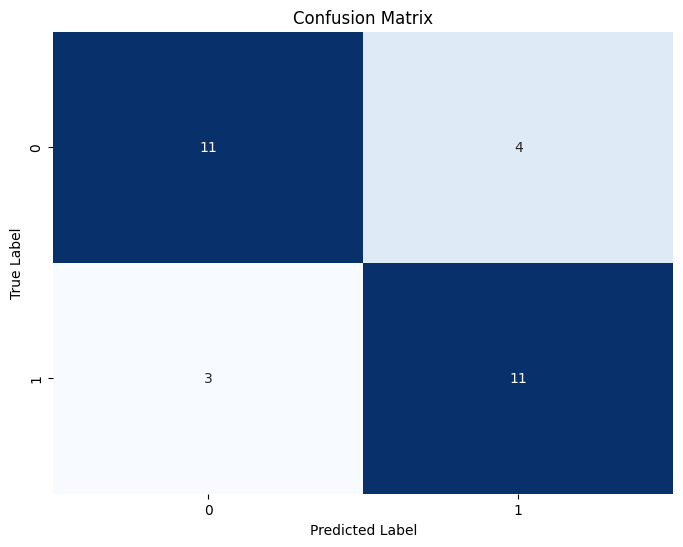

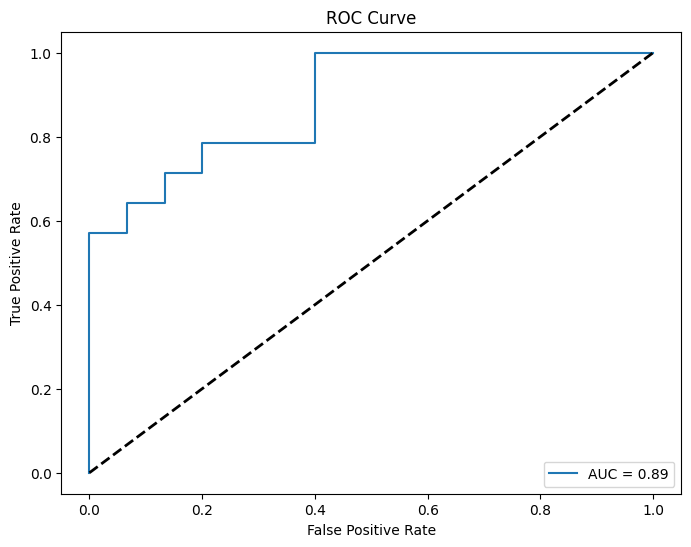

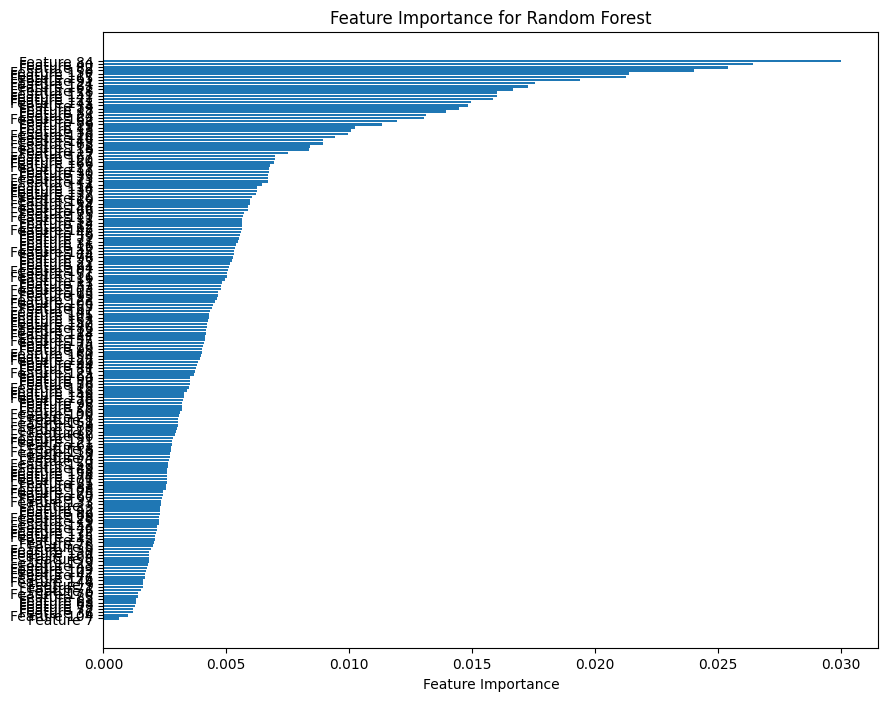

In [24]:
# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ROC Curve
y_prob = grid_search.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Feature Importance (for Random Forest)
if hasattr(grid_search.best_estimator_, 'feature_importances_'):
    feature_importance = grid_search.best_estimator_.feature_importances_
    sorted_idx = np.argsort(feature_importance)
    
    plt.figure(figsize=(10, 8))
    plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
    plt.yticks(range(len(sorted_idx)), [f'Feature {i}' for i in sorted_idx])
    plt.xlabel("Feature Importance")
    plt.title("Feature Importance for Random Forest")
    plt.show()

## Interpretation and conclusion : 

From the given results the Random Forest model was optimized with the best parameters and achieved the following results:

Global Accuracy: 76%

AUC: 0.89, indicating strong discriminative power between COVID-positive and COVID-free patients.

Precision/Recall: For both classes, precision and recall hover around 0.73 to 0.79, showing a balanced model performance.

Confusion Matrix:

True Positives: 11, True Negatives: 11
False Positives: 4, False Negatives: 3
The model struggles slightly with false positives and negatives but still performs well for the dataset size.
Feature Importance: Only a few features significantly impact the model’s decision-making, while the rest contribute little.

#### Conclusion: 
 The model demonstrates good overall performance in distinguishing between COVID-free and COVID-positive cases.